<a href="https://colab.research.google.com/github/aryan4avj/Stock-Analysis-and-Prediction/blob/main/stock_market_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Import Pandas, Numpy and PlotLy for Data visualization.
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from pandas_datareader import data, wb
from datetime import date
#Uploading market data for 2019 and 2020
COVID_data = "/content/drive/MyDrive/SPY (1).csv"
PRE_COVID_data = "/content/drive/MyDrive/SPY (2).csv"

In [8]:
df = pd.read_csv(COVID_data)
pf = pd.read_csv(PRE_COVID_data)
df.head()

FileNotFoundError: ignored

In [ ]:
df.tail()

In [ ]:
print(df.dtypes)

In [ ]:
# # change date
# import datetime as dt


# df['Date'] = pd.to_datetime(df['Date'])
# df['Date']=df['Date'].map(dt.datetime.toordinal)

# #also for second dataset
# pf['Date'] = pd.to_datetime(df['Date'])
# pf['Date']=pf['Date'].map(dt.datetime.toordinal)

In [ ]:
df.head()

In [9]:
print(df.dtypes)

NameError: ignored

In [ ]:
categorical_data = df.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns                                                                              # we will store the categorical features in a variable


print("Categorical Features:")
print(categorical_data.head())
print(categorical_col)
print("===="*20)

In [10]:
df["Daily_return"] = (1+df["Close"]).pct_change(1)
df["Daily_return"] = ((df["Close"]/df["Close"].shift(1))-1) 

NameError: ignored

In [ ]:
print(df.dtypes)

In [11]:
df.head()

NameError: ignored

In [ ]:
pf["Daily_return"] = (1+pf["Close"]).pct_change(1)
pf["Daily_return"] = ((pf["Close"]/pf["Close"].shift(1))-1) 

In [ ]:
pf.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return
0,2018-01-02,267.839996,268.809998,267.399994,268.769989,252.457245,86655700,NaN
1,2018-01-03,268.959991,270.640015,268.959991,270.470001,254.054001,90070400,0.006325
2,2018-01-04,271.200012,272.160004,270.540009,271.609985,255.124817,80636400,0.004215
3,2018-01-05,272.510010,273.559998,271.950012,273.420013,256.825012,83524000,0.006664
4,2018-01-08,273.309998,274.100006,272.980011,273.920013,257.294708,57319200,0.001829


In [ ]:
total = df.isnull().sum()

# Converting the missing values in percentage
percent = (df.isnull().sum()/df.isnull().count())

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return
0,2020-01-02,323.540009,324.890015,322.529999,324.869995,316.836670,59151200,NaN
1,2020-01-03,321.160004,323.640015,321.100006,322.410004,314.437500,77709700,-0.007572
2,2020-01-06,320.489990,323.730011,320.359985,323.640015,315.637115,55653900,0.003815
3,2020-01-07,323.019989,323.540009,322.239990,322.730011,314.749573,40496400,-0.002812
4,2020-01-08,322.940002,325.779999,322.670013,324.450012,316.427063,68296000,0.005330


In [ ]:
df = df.drop((percent[percent > 0.6]).index,axis= 1)

# checking null values
print(df.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily_return    1
dtype: int64


In [ ]:
total = pf.isnull().sum()

# Converting the missing values in percentage
percent = (pf.isnull().sum()/pf.isnull().count())

pf.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return
0,2018-01-02,267.839996,268.809998,267.399994,268.769989,252.457245,86655700,NaN
1,2018-01-03,268.959991,270.640015,268.959991,270.470001,254.054001,90070400,0.006325
2,2018-01-04,271.200012,272.160004,270.540009,271.609985,255.124817,80636400,0.004215
3,2018-01-05,272.510010,273.559998,271.950012,273.420013,256.825012,83524000,0.006664
4,2018-01-08,273.309998,274.100006,272.980011,273.920013,257.294708,57319200,0.001829


In [ ]:
pf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return
497,2019-12-23,321.589996,321.649994,321.059998,321.220001,313.276947,52990000,0.001528
498,2019-12-24,321.470001,321.519989,320.899994,321.230011,313.286652,20270000,0.000031
499,2019-12-26,321.649994,322.950012,321.640015,322.940002,314.954376,30911200,0.005323
500,2019-12-27,323.739990,323.799988,322.279999,322.859985,314.876373,42528800,-0.000248
501,2019-12-30,322.950012,323.100006,320.549988,321.079987,313.140411,49729100,-0.005513


In [ ]:
pf = pf.drop((percent[percent > 0.6]).index,axis= 1)

# checking null values
print(pf.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily_return    1
dtype: int64


In [ ]:
print(df.dtypes)

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Daily_return    float64
dtype: object


In [ ]:
print(pf.dtypes)

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Daily_return    float64
dtype: object


In [ ]:
# Add histogram data
from plotly.figure_factory import create_distplot
x1 = df["Daily_return"].fillna(0)
x2 = pf["Daily_return"].fillna(0)
# Group data together
hist_data = [x1, x2]
group_labels = ["COVID", "PRE_COVID"]
# Create distplot with custom bin_size (set bin size = 0.5% return)
fig = create_distplot(hist_data, group_labels, bin_size=.005)
fig.show()

In [ ]:
#Mean calculation
pf['Daily_return'].mean()
df['Daily_return'].mean()
#Median calculation
pf['Daily_return'].median()
df['Daily_return'].median()
#Standard Deviation calculation
pf['Daily_return'].std()
df['Daily_return'].std()
#Percentile at 2.5% and 97.5%
pf['Daily_return'].quantile(.025)
pf['Daily_return'].quantile(.975)
df['Daily_return'].quantile(.025)
df['Daily_return'].quantile(.975)

0.031064500327150316

Machine Learning


In [29]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler


In [64]:
cf=pd.read_csv("/content/NSE-Tata-Global-Beverages-Limited.csv")
cf.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [ ]:
cf=pd.read_csv("/content/drive/MyDrive/NSE-Tata-Global-Beverages-Limited.csv")
cf.head()

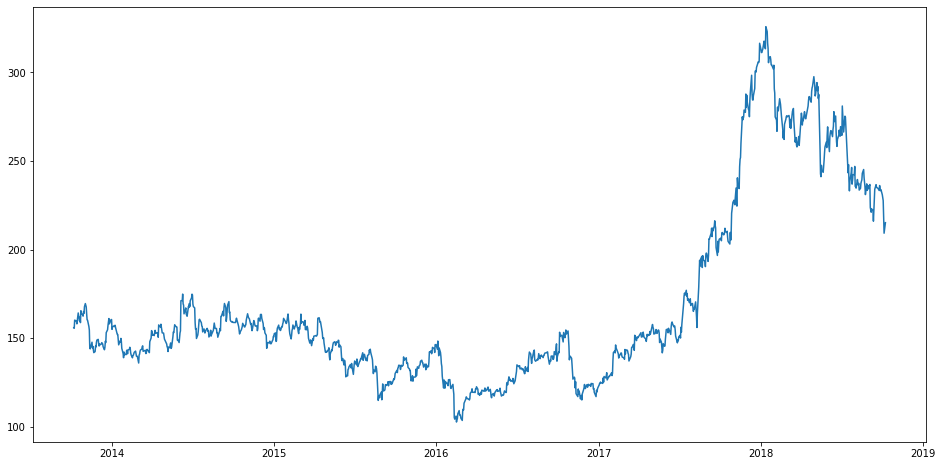

In [65]:
cf["Date"]=pd.to_datetime(cf.Date,format="%Y-%m-%d")
cf.index=cf['Date']

plt.figure(figsize=(16,8))
plt.plot(cf["Close"],label='Close Price history')


In [66]:
data=cf.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(cf)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [43]:
new_dataset.shape

(1235, 2)

In [69]:
new_dataset.head()

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [68]:
new_dataset["Date"].apply('str')

'0       2013-10-08 00:00:00\n1       2013-10-09 00:00:00\n2       2013-10-10 00:00:00\n3       2013-10-11 00:00:00\n4       2013-10-14 00:00:00\n               ...         \n1230    2018-10-01 00:00:00\n1231    2018-10-03 00:00:00\n1232    2018-10-04 00:00:00\n1233    2018-10-05 00:00:00\n1234    2018-10-08 00:00:00\nName: Date, Length: 1235, dtype: object'

In [70]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

train_data=[]
valid_data=[]

In [56]:
final_dataset.shape

(1235, 2)

In [71]:
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

In [72]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [73]:
# new_dataset.index=new_dataset.Date
# new_dataset.drop("Date",axis=1,inplace=True)

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [76]:
y_train_data.shape

(927,)

In [93]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=25,batch_size=20,verbose=2)

Epoch 1/25
47/47 - 6s - loss: 0.0040
Epoch 2/25
47/47 - 2s - loss: 8.0779e-04
Epoch 3/25
47/47 - 2s - loss: 7.4254e-04
Epoch 4/25
47/47 - 2s - loss: 7.2166e-04
Epoch 5/25
47/47 - 2s - loss: 6.6296e-04
Epoch 6/25
47/47 - 2s - loss: 7.1551e-04
Epoch 7/25
47/47 - 2s - loss: 5.9771e-04
Epoch 8/25
47/47 - 2s - loss: 5.3383e-04
Epoch 9/25
47/47 - 2s - loss: 5.0561e-04
Epoch 10/25
47/47 - 2s - loss: 4.8102e-04
Epoch 11/25
47/47 - 2s - loss: 4.6357e-04
Epoch 12/25
47/47 - 2s - loss: 4.3113e-04
Epoch 13/25
47/47 - 2s - loss: 4.2760e-04
Epoch 14/25
47/47 - 2s - loss: 3.9578e-04
Epoch 15/25
47/47 - 2s - loss: 3.7982e-04
Epoch 16/25
47/47 - 2s - loss: 3.9596e-04
Epoch 17/25
47/47 - 2s - loss: 3.9698e-04
Epoch 18/25
47/47 - 2s - loss: 3.6543e-04
Epoch 19/25
47/47 - 2s - loss: 3.2025e-04
Epoch 20/25
47/47 - 2s - loss: 3.1563e-04
Epoch 21/25
47/47 - 2s - loss: 3.2274e-04
Epoch 22/25
47/47 - 2s - loss: 3.1562e-04
Epoch 23/25
47/47 - 2s - loss: 2.9287e-04
Epoch 24/25
47/47 - 2s - loss: 2.9093e-04
Epoch

In [94]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



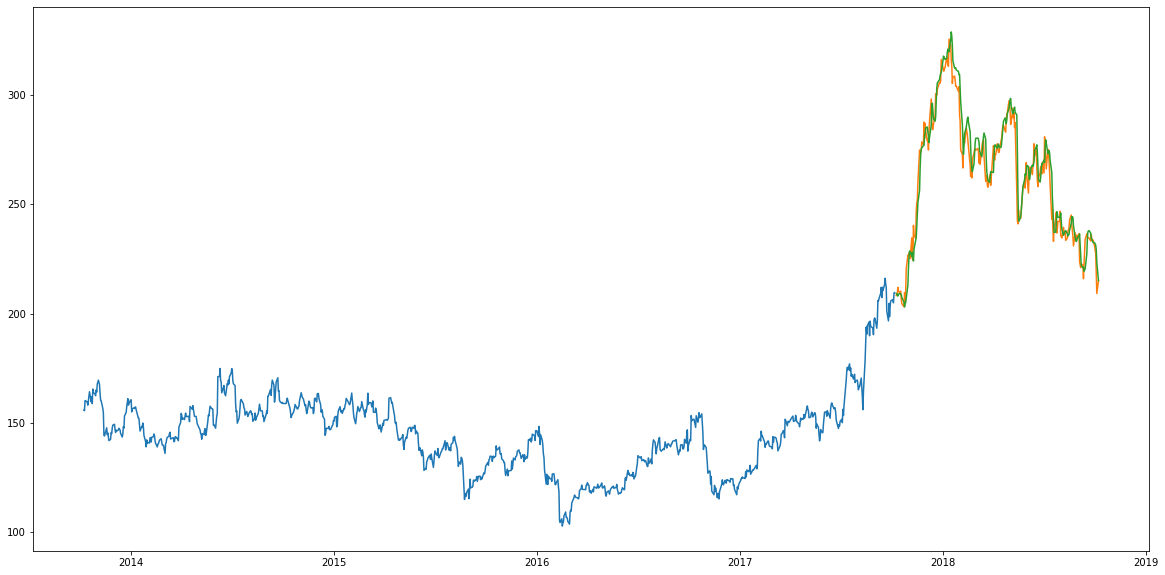

In [95]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

In [97]:
valid_data.head(20)

,Close,Predictions
Date,,
2017-10-09,208.3,209.208435
2017-10-10,208.45,209.024887
2017-10-11,209.4,208.350525
2017-10-12,212,208.030426
2017-10-13,210.25,208.974350
2017-10-16,209.6,209.242142
2017-10-17,210.3,208.933380
2017-10-18,206.8,208.842194
2017-10-19,204.6,207.411865
